# Named Entity Recognition (NER) with Spacy

This simple example showcases `spacy`'s capability in NER.

## Installation

In [1]:
#!pip install spacy                         #==3.7.2
#!pip install spacy-transformers

# small, lightweight model
!python -m spacy download en_core_web_trf   

# this is a very large model --> use it locally, but you will run out of memory on MyBinder.org cloud environment
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     ---------------------------------------- 1.3/457.4 MB 6.6 MB/s eta 0:01:10
     ---------------------------------------- 2.6/457.4 MB 6.6 MB/s eta 0:01:10
     ---------------------------------------- 3.9/457.4 MB 6.6 MB/s eta 0:01:09
     ---------------------------------------- 5.5/457.4 MB 6.6 MB/s eta 0:01:09
      --------------------------------------- 6.8/457.4 MB 6.6 MB/s eta 0:01:09
      --------------------------------------- 8.1/457.4 MB 6.6 MB/s eta 0:01:09
      --------------------------------------- 9.4/457.4 MB 6.5 MB/s eta 0:01:09
      -------------------------------------- 10.5/457.4 MB 6.5 MB/s eta 0:01:09
      -------------------------------------- 11.0/457.4 MB 6.0 MB/s eta 0:01:15
     - ------------------------------------- 12.6/457.4 MB 5.9 MB/s eta 0:01:16
     - ------------------------------------- 13.9/457.4 MB 6.0 MB/s eta 0:01:15
     - ------------------------------------- 15

In [2]:
USE_LIGHT_MODEL = True  # set False to try the transformer model

In [3]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"   # HF tokenizers
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"      # helps some MKL/OpenMP conflicts on Windows

import torch
try:
    torch.set_num_threads(1)                     # avoid oversubscription crashes
except Exception:
    pass

In [5]:
# Check package versions:
import spacy, sys
print("spaCy:", spacy.__version__, "Python:", sys.version)

# Try loading Spacy's transformer model and do sanity check:
if USE_LIGHT_MODEL:
    # small model, keep tok2vec+ner+senter so doc.sents works
    nlp = spacy.load(
        "en_core_web_sm",
        disable=["tagger", "parser", "attribute_ruler", "lemmatizer", "morphologizer"]
    )
    print("Using lightweight model!")
else:
    # transformer model, keep transformer+ner+senter only
    nlp = spacy.load(
        "en_core_web_trf",
        exclude=["tagger", "parser", "attribute_ruler", "lemmatizer", "morphologizer"]
    )
    print("Using heavy transformer model!")
    
doc = nlp("GreenCapital raised £3 million in Sydney.")
[(ent.text, ent.label_) for ent in doc.ents]

spaCy: 3.8.7 Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
Using lightweight model!


[('GreenCapital', 'ORG'), ('£3 million', 'MONEY'), ('Sydney', 'GPE')]

## Implementation

In [6]:
import spacy
from spacy import displacy
import pandas as pd

# Load the lightweight OR the transformer-based model
# The transformer-based model uses RoBERTa under the hood and provides state-of-the-art NER capabilities
print("Loading transformer model...")

if USE_LIGHT_MODEL:
    # small model, keep tok2vec+ner+senter so doc.sents works
    nlp = spacy.load(
        "en_core_web_sm",
        disable=["tagger", "parser", "attribute_ruler", "lemmatizer", "morphologizer"]
    )
    print("Lightweight model loaded!")
else:
    # transformer model, keep transformer+ner+senter only
    nlp = spacy.load(
        "en_core_web_trf",
        exclude=["tagger", "parser", "attribute_ruler", "lemmatizer", "morphologizer"]
    )
    print("Heavy transformer model loaded!")


Loading transformer model...
Lightweight model loaded!


In [7]:
# Example text with various entity types
text = """
Apple Inc. is planning to open a new office in New York City by March 2025, 
according to CEO Tim Cook. The company will invest $50 million in the project, 
which is expected to create 500 jobs. Google and Microsoft are also expanding 
their operations in the United States. The Federal Reserve's recent policy 
announcement might impact these plans. United Nations will meet tomorrow to discus the specifics. 
Under the UN protocoal, Apple will have to abide by strict environmental guidelines. Yesterday, Cook
declaired that he will return to L.A. and will continue the talks, said it will take place next month, on the first Monday.
"""

In [8]:
# Process the text with the transformer model
doc = nlp(text)

In [9]:
# Display identified entities
print("\nIdentified Entities:")
print("-" * 50)
for ent in doc.ents:
    print(f"Entity: {ent.text}\nType: {ent.label_}\nDescription: {spacy.explain(ent.label_)}\n")


Identified Entities:
--------------------------------------------------
Entity: Apple Inc.
Type: ORG
Description: Companies, agencies, institutions, etc.

Entity: New York City
Type: GPE
Description: Countries, cities, states

Entity: March 2025
Type: DATE
Description: Absolute or relative dates or periods

Entity: Tim Cook
Type: PERSON
Description: People, including fictional

Entity: $50 million
Type: MONEY
Description: Monetary values, including unit

Entity: 500
Type: CARDINAL
Description: Numerals that do not fall under another type

Entity: Google
Type: ORG
Description: Companies, agencies, institutions, etc.

Entity: Microsoft
Type: ORG
Description: Companies, agencies, institutions, etc.

Entity: the United States
Type: GPE
Description: Countries, cities, states

Entity: The Federal Reserve's
Type: ORG
Description: Companies, agencies, institutions, etc.

Entity: United Nations
Type: ORG
Description: Companies, agencies, institutions, etc.

Entity: tomorrow
Type: DATE
Descript

In [10]:
# Create a DataFrame for better visualization
entities_data = []
for ent in doc.ents:
    entities_data.append({
        "Text": ent.text,
        "Start": ent.start_char,
        "End": ent.end_char,
        "Type": ent.label_,
        "Description": spacy.explain(ent.label_)
    })

df = pd.DataFrame(entities_data)
print("Entities DataFrame:")
display(df)


Entities DataFrame:


,Text,Start,End,Type,Description
0,Apple Inc.,1,11,ORG,"Companies, agencies, institutions, etc."
1,New York City,48,61,GPE,"Countries, cities, states"
2,March 2025,65,75,DATE,Absolute or relative dates or periods
3,Tim Cook,95,103,PERSON,"People, including fictional"
4,$50 million,129,140,MONEY,"Monetary values, including unit"
5,500,186,189,CARDINAL,Numerals that do not fall under another type
6,Google,196,202,ORG,"Companies, agencies, institutions, etc."
7,Microsoft,207,216,ORG,"Companies, agencies, institutions, etc."
8,the United States,257,274,GPE,"Countries, cities, states"
9,The Federal Reserve's,276,297,ORG,"Companies, agencies, institutions, etc."


In [11]:
# Visualize NER results in HTML (you can display this in a notebook or save to file)

html = displacy.render(doc, style="ent", jupyter=False)

# Save the visualization to an HTML file
with open("ner_visualization.html", "w", encoding="utf-8") as f:
    f.write(html)
print("\nVisualization saved to 'ner_visualization.html'")


Visualization saved to 'ner_visualization.html'


### A quick DATE timeline (handles “March 2025”, “tomorrow”, etc.)

C:\Users\Vitali\AppData\Local\Temp\ipykernel_21964\926148862.py:10: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  dt = dateparser.parse(e.text, settings={"RELATIVE_BASE": datetime.now()})


,text,parsed
0,March 2025,2025-03-19
1,tomorrow,2025-08-20
2,Yesterday,2025-08-18
3,next month,2025-09-19


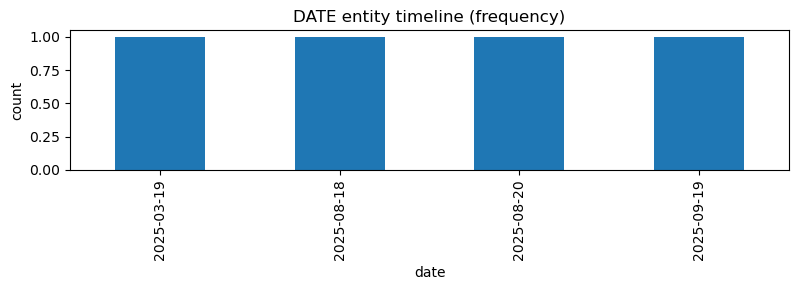

In [12]:
#!pip install dateparser
import re, calendar
import matplotlib.pyplot as plt, pandas as pd
from datetime import datetime
import dateparser

dates = []
for e in doc.ents:
    if e.label_ == "DATE":
        dt = dateparser.parse(e.text, settings={"RELATIVE_BASE": datetime.now()})
        if dt:
            dates.append({"text": e.text, "parsed": dt.date()})

df_dates = pd.DataFrame(dates).dropna()
display(df_dates)

if not df_dates.empty:
    counts = df_dates.value_counts("parsed").sort_index()
    counts.plot(kind="bar", figsize=(8,3))
    plt.title("DATE entity timeline (frequency)")
    plt.ylabel("count"); plt.xlabel("date")
    plt.tight_layout(); plt.show()

### [optional] A more detailed DATE timeline (handles ambiguous dates)

,entity_text,parsed_date
2,Yesterday,2025-08-18
1,tomorrow,2025-08-20
3,next month,2025-09-19


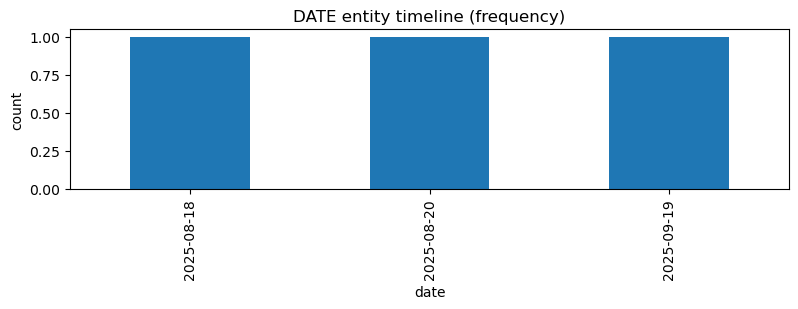

In [13]:
# DATE entity timeline with robust parsing (no deprecation warnings)
# Requirements: dateparser, pandas, matplotlib, (spaCy doc already built OR we'll build a small demo)

import re, calendar, warnings
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# ---- 0) Optional: silence that Python 3.15 deprecation warning in logs (we also fix the root cause below)
warnings.filterwarnings(
    "ignore",
    message=r"Parsing dates involving a day of month without a year specified is ambiguious",
    category=DeprecationWarning,
)

# ---- 1) Robust date parser that appends a year when missing & respects AU/UK date order
import dateparser

_MONTHS = tuple("january february march april may june july august september october november december".split())

def parse_date_safe(text: str,
                    base: datetime | None = None,
                    assume_year: int | str = "base",   # "base" -> use base.year, or pass an int
                    prefer: str = "future"             # "future" | "past" | "current_period"
                   ):
    """
    Parse natural-language date strings robustly:
      - If a month name is present but no 4-digit year, attach an explicit year (default = base.year).
      - Handles 29 Feb by picking the next valid leap year when needed.
      - Uses DATE_ORDER='DMY' for AU/UK style and STRICT_PARSING to avoid silent misparses.
    Returns a datetime or None.
    """
    base = base or datetime.now()
    s = (text or "").strip()
    has_year = re.search(r"\b(19|20)\d{2}\b", s) is not None
    has_month_word = any(m in s.lower() for m in _MONTHS)

    if has_month_word and not has_year:
        year = base.year if assume_year == "base" else int(assume_year)
        # If it's 29 Feb and chosen year isn't leap, pick a valid leap year
        if re.search(r"\b(29\s*(?:feb|february))\b", s, flags=re.I) and not calendar.isleap(year):
            y = year + (4 - year % 4)
            year = y if calendar.isleap(y) else y + 4
        s = f"{s} {year}"

    return dateparser.parse(
        s,
        settings={
            "RELATIVE_BASE": base,
            "DATE_ORDER": "DMY",              # Australian/UK day-month-year
            "PREFER_DATES_FROM": prefer,      # useful for schedules; change to "past" for news logs
            "STRICT_PARSING": True,           # fail rather than guess
            "DEFAULT_LANGUAGES": ["en"],
        },
    )

# ---- 2) Use existing spaCy doc if available; else build a quick demo
try:
    doc  # noqa: F821
except NameError:
    import spacy
    try:
        nlp = spacy.load("en_core_web_trf")
    except Exception:
        nlp = spacy.load("en_core_web_sm")
    text = (
        "Apple Inc. opens a Sydney hub on 5 March, with hiring starting tomorrow. "
        "Launch is planned for March 2025, and a review happens on 29 February. "
        "The UN meets next week; follow-up set for 15/09."
    )
    doc = nlp(text)

# ---- 3) Extract DATE entities and parse safely
rows = []
base = datetime.now()
for e in doc.ents:
    if e.label_ == "DATE":
        dt = parse_date_safe(e.text, base=base, assume_year="base", prefer="future")
        rows.append({"entity_text": e.text, "parsed_dt": dt})

df_dates = pd.DataFrame(rows)
# Drop unparsed / keep only date portion for plotting
df_dates = df_dates.dropna(subset=["parsed_dt"]).assign(parsed_date=lambda d: d["parsed_dt"].dt.date)

# ---- 4) Show the mapping table
if df_dates.empty:
    print("No DATE entities parsed.")
else:
    display(df_dates[["entity_text", "parsed_date"]].sort_values("parsed_date"))

    # ---- 5) Plot a simple timeline (frequency by date)
    counts = df_dates.value_counts("parsed_date").sort_index()
    plt.figure(figsize=(8, 3.2))
    counts.plot(kind="bar")
    plt.title("DATE entity timeline (frequency)")
    plt.ylabel("count")
    plt.xlabel("date")
    plt.tight_layout()
    plt.show()
